<a href="https://colab.research.google.com/github/YashChaudhary16/PyTorch/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [32]:
# Import necessary libraries

import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Setup device-agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [34]:
# Create the data parameters
weight = 0.8
bias = 0.3

# Make X and y using linear regression feature
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1).to(device)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 50
Number of y samples: 50
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]], device='cuda:0')
y: tensor([[0.3000],
        [0.3160],
        [0.3320],
        [0.3480],
        [0.3640],
        [0.3800],
        [0.3960],
        [0.4120],
        [0.4280],
        [0.4440]], device='cuda:0')


In [35]:
# Split the data into training and testing
train_split = int(0.7*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

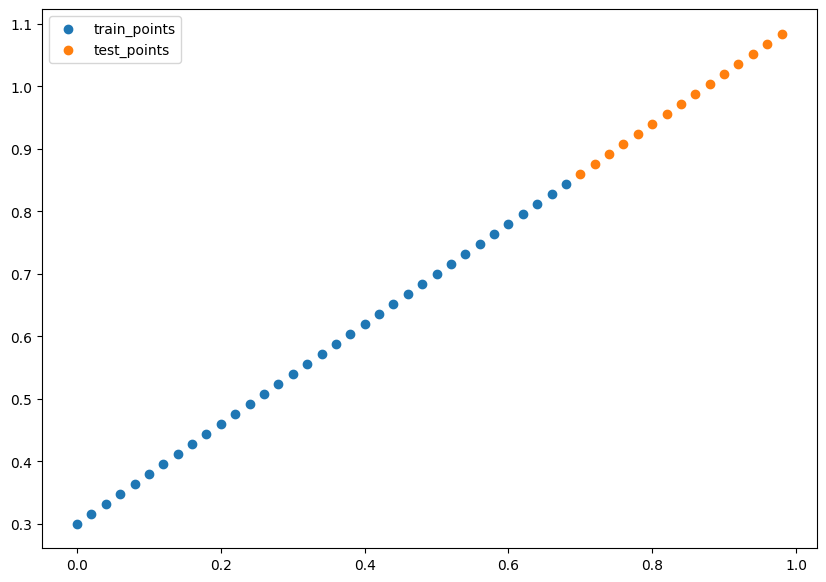

In [36]:
# Plot the training and testing data

def plot_predictions(train_data=X_train.cpu(),
                 train_label=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_label=y_test.cpu(),
                 predictions=None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_label)
  plt.scatter(test_data, test_label)

  if predictions is not None:
    plt.scatter(test_data, predictions,c='g')

  plt.legend(['train_points','test_points','predictions'])
  plt.show()

plot_predictions()

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [37]:
# Create PyTorch linear regression model by subclassing nn.Module

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [38]:
# Instantiate the model and put it to the target device
torch.manual_seed(42)

model_0 = LinearRegressionModel().to(device)
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [39]:
# Create the loss function and optimizer

loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [40]:
# Training loop


# Train model for 300 epochs
epochs = 300

# Send data to target device


for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0.forward(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
      model_0.eval()
      # 1. Forward pass
      model_0.forward(X_test)
      # 2. Calculate test loss
      test_loss = loss_fn(model_0(X_test), y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.268 | Test loss: 0.237
Epoch: 20 | Train loss: 0.109 | Test loss: 0.076
Epoch: 40 | Train loss: 0.045 | Test loss: 0.020
Epoch: 60 | Train loss: 0.019 | Test loss: 0.003
Epoch: 80 | Train loss: 0.009 | Test loss: 0.000
Epoch: 100 | Train loss: 0.004 | Test loss: 0.001
Epoch: 120 | Train loss: 0.003 | Test loss: 0.003
Epoch: 140 | Train loss: 0.002 | Test loss: 0.004
Epoch: 160 | Train loss: 0.001 | Test loss: 0.005
Epoch: 180 | Train loss: 0.001 | Test loss: 0.006
Epoch: 200 | Train loss: 0.001 | Test loss: 0.006
Epoch: 220 | Train loss: 0.001 | Test loss: 0.006
Epoch: 240 | Train loss: 0.001 | Test loss: 0.006
Epoch: 260 | Train loss: 0.001 | Test loss: 0.006
Epoch: 280 | Train loss: 0.001 | Test loss: 0.006


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [47]:
# Make predictions with the model
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

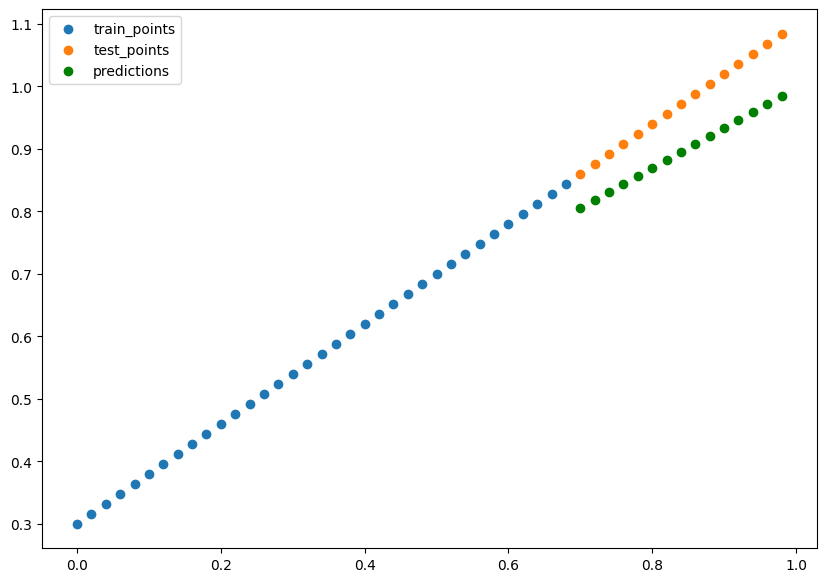

In [49]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_preds.cpu())

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [50]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_exercise_model.pth'
PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(model_0.state_dict(), f=PATH)

In [51]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
model_check = LinearRegressionModel().to(device)
print(model_check.state_dict())
model_check.load_state_dict(torch.load(f=PATH))
print(model_check.state_dict())
print(f"Original Bias: {bias}, Original Weight: {weight}")


OrderedDict([('linear_layer.weight', tensor([[-0.2343]], device='cuda:0')), ('linear_layer.bias', tensor([0.9186], device='cuda:0'))])
OrderedDict([('linear_layer.weight', tensor([[0.6412]], device='cuda:0')), ('linear_layer.bias', tensor([0.3566], device='cuda:0'))])
Original Bias: 0.3, Original Weight: 0.8


<ipython-input-51-5f1af0c047fa>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_check.load_state_dict(torch.load(f=PATH))


In [52]:
# Make predictions with loaded model and compare them to the previous
model_check.eval()
with torch.inference_mode():
  y_preds_loaded = model_check(X_test)
y_preds_loaded

tensor([[0.8054],
        [0.8183],
        [0.8311],
        [0.8439],
        [0.8567],
        [0.8696],
        [0.8824],
        [0.8952],
        [0.9080],
        [0.9209],
        [0.9337],
        [0.9465],
        [0.9593],
        [0.9722],
        [0.9850]], device='cuda:0')

In [53]:
print(y_preds_loaded==y_preds)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')
